# Process NetCDF files and store them as TIF file

Source: 
- https://gis.stackexchange.com/questions/323317/converting-netcdf-dataset-array-to-geotiff-using-rasterio-python
- https://corteva.github.io/rioxarray/stable/readme.html

### Import modules

In [1]:
import rioxarray
import xarray

### Load the data 

In [2]:
netCDF_xds = xarray.open_dataset("C:/Users/tamta/Documents/Studium/02_Master/17_Masterarbeit/03_Data/MSGSpectral_NC/MSG_channels_201707011300.nc")
netCDF_xds

<xarray.Dataset>
Dimensions:    (x: 1037, y: 564)
Coordinates:
  * y          (y) float64 65.97 65.91 65.86 65.8 ... 35.16 35.11 35.05 35.0
  * x          (x) float64 -18.0 -17.95 -17.89 -17.84 ... 38.87 38.92 38.98
    longitude  (y, x) float64 ...
    latitude   (y, x) float64 ...
Data variables:
    IR_016     (y, x) float32 ...
    proj4      int64 ...
    IR_039     (y, x) float32 ...
    IR_087     (y, x) float32 ...
    IR_097     (y, x) float32 ...
    IR_108     (y, x) float32 ...
    IR_120     (y, x) float32 ...
    IR_134     (y, x) float32 ...
    VIS006     (y, x) float32 ...
    VIS008     (y, x) float32 ...
    WV_062     (y, x) float32 ...
    WV_073     (y, x) float32 ...
Attributes:
    history:      Created by pytroll/satpy on 2020-09-15 22:00:17.043409
    Conventions:  CF-1.7

### Access the data
#### Show available channels

In [3]:
#access the channels
#ignore proj4
netCDF_xds.data_vars

Data variables:
    IR_016   (y, x) float32 ...
    proj4    int64 ...
    IR_039   (y, x) float32 ...
    IR_087   (y, x) float32 ...
    IR_097   (y, x) float32 ...
    IR_108   (y, x) float32 ...
    IR_120   (y, x) float32 ...
    IR_134   (y, x) float32 ...
    VIS006   (y, x) float32 ...
    VIS008   (y, x) float32 ...
    WV_062   (y, x) float32 ...
    WV_073   (y, x) float32 ...

#### Derive one channel

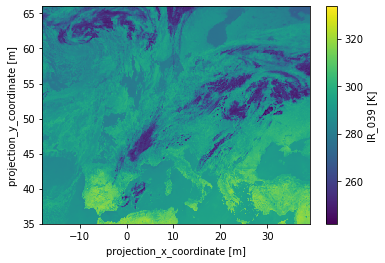

In [4]:
#chose one channel
band = "IR_039"
#show the channel
netCDF_xds[band].plot()
#define the xarray (contains information of that one channel only)
dat = netCDF_xds[band]

#### Adjust CRS

In [8]:
#assign the original crs of the data
dat = dat.rio.set_crs("EPSG:4326")
dat

<xarray.DataArray 'IR_039' (y: 564, x: 1037)>
[584868 values with dtype=float32]
Coordinates:
  * y          (y) float64 65.97 65.91 65.86 65.8 ... 35.16 35.11 35.05 35.0
  * x          (x) float64 -18.0 -17.95 -17.89 -17.84 ... 38.87 38.92 38.98
    longitude  (y, x) float64 ...
    latitude   (y, x) float64 ...
Attributes:
    calibration:         brightness_temperature
    end_time:            2017-07-01 13:15:09.791000
    file_type:           seviri_l1b_nc
    grid_proj4:          +proj=longlat +datum=WGS84 +no_defs +type=crs
    long_name:           IR_039
    modifiers:           []
    orbital_parameters:  {"projection_longitude": 0.0, "projection_latitude":...
    platform_name:       Meteosat-10
    resolution:          3000.403165817
    sensor:              seviri
    standard_name:       toa_brightness_temperature
    start_time:          2017-07-01 13:00:10.100000
    units:               K
    wavelength:          [3.48 3.92 4.36]

#### Crop the data to a certain extent

In [6]:
#crop the data to a certain extent
#3.6, 46.7, 15.7, 55.2
#xmin, ymin, xmax, ymax
min_lon = 3.6
min_lat = 46.7
max_lon = 15.7
max_lat = 55.2

subset = dat.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)

<xarray.DataArray 'IR_039' (y: 155, x: 221)>
array([[289.90637, 286.85995, 284.56644, ..., 293.4683 , 292.8856 , 292.29056],
       [287.1515 , 283.75568, 280.97852, ..., 294.81976, 294.59894, 294.03925],
       [284.2451 , 281.34235, 280.60947, ..., 292.64908, 291.43576, 290.16718],
       ...,
       [254.3985 , 253.81255, 253.81255, ..., 295.14786, 294.15204, 294.48785],
       [251.94777, 253.20956, 254.96837, ..., 295.36453, 295.2564 , 295.0389 ],
       [251.94777, 253.81255, 254.96837, ..., 296.42398, 296.9395 , 295.57956]],
      dtype=float32)
Coordinates:
  * y            (y) float64 55.19 55.13 55.08 55.02 ... 46.88 46.82 46.77 46.71
  * x            (x) float64 3.615 3.67 3.725 3.78 ... 15.55 15.6 15.66 15.71
    longitude    (y, x) float64 3.615 3.67 3.725 3.78 ... 15.55 15.6 15.66 15.71
    latitude     (y, x) float64 55.19 55.19 55.19 55.19 ... 46.71 46.71 46.71
    spatial_ref  int32 0
Attributes:
    calibration:         brightness_temperature
    end_time:            

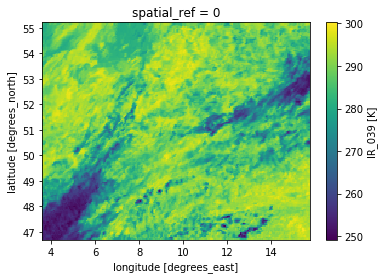

In [7]:
subset.plot()
subset

#### Save as TIF file

In [68]:
#open the netCDF and store it as TIF file
subset.rio.to_raster("C:/Users/tamta/Documents/Studium/02_Master/17_Masterarbeit/03_Data/MSGSpectral_Raster/MSG_channels_201707011300_clip.tif")